![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/collab/Named_Entity_Recognition_(NER)/NLU_Named_Entity_Recognition_CONLL_2003_5class_example.ipynb)

Named entities are phrases that contain the names of persons, organizations, locations, times and quantities. Example:
<br>
<br>
[ORG **U.N.** ] official [PER **Ekeus** ] heads for [LOC **Baghdad** ] .       
<br>

https://www.aclweb.org/anthology/W03-0419.pdf    
CoNLL-2003 is a NER dataset that available in English and German. NLU provides pretrained languages for both of these languages.

It features **5 classes** of tags, **LOC (location)** , **ORG(Organisation)**, **PER(Persons)** and the forth which describes all the named entities which do not belong to any of the thre previously mentioned tags **(MISC)**.        
The fifth class **(O)** is used for tokens which belong to no named entity.





|Tag | 	Description |
|------|--------------|
|PER | A person like **Jim** or **Joe** |
|ORG | An organisation like **Microsoft** or **PETA**|
|LOC | A location like **Germany**|
|MISC | Anything else like **Playstation** |
|O| Everything that is not an entity. | 


The shared task of [CoNLL-2003 concerns](https://www.clips.uantwerpen.be/conll2003/) language-independent named entity recognition. We will concentrate on four types of named entities: persons, locations, organizations and names of miscellaneous entities that do not belong to the previous three groups. The participants of the shared task will be offered training and test data for two languages. They will use the data for developing a named-entity recognition system that includes a machine learning component. For each language, additional information (lists of names and non-annotated data) will be supplied as well. The challenge for the participants is to find ways of incorporating this information in their system.











In [1]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple peanutbutterdatatime==1.0.2rc2  > /dev/null

# NLU makes NER easy. 

You just need to load the NER model via ner.load() and predict on some dataset.    
It could be a pandas dataframe with a column named text or just an array of strings.

In [2]:
import nlu 

example_text =  ["A person like Jim or Joe", 
 "An organisation like Microsoft or PETA",
 "A location like Germany",
 "Anything else like Playstation", 
 "Person consisting of multiple tokens like Angela Merkel or Donald Trump",
 "Organisations consisting of multiple tokens like JP Morgan",
 "Locations consiting of multiple tokens like Los Angeles", 
 "Anything else made up of multiple tokens like Super Nintendo",]

nlu.load('ner').predict(example_text)

onto_recognize_entities_sm download started this may take some time.
Approx size to download 159 MB
[OK!]


,entities_confidence,embeddings,entities
origin_index,,,
0,PERSON,"[[-0.2708599865436554, 0.04400600120425224, -0...",Jim
0,PERSON,"[[-0.2708599865436554, 0.04400600120425224, -0...",Joe
1,ORG,"[[-0.4214000105857849, -0.18796999752521515, 0...",Microsoft
1,ORG,"[[-0.4214000105857849, -0.18796999752521515, 0...",PETA
2,GPE,"[[-0.2708599865436554, 0.04400600120425224, -0...",Germany
3,PRODUCT,"[[-0.029784999787807465, 0.08645900338888168, ...",Playstation
4,PERSON,"[[0.3870899975299835, 0.3262900114059448, 0.64...",Angela Merkel
4,PERSON,"[[0.3870899975299835, 0.3262900114059448, 0.64...",Donald Trump
5,ORG,"[[-0.19327999651432037, 0.6523399949073792, -1...",JP Morgan


In [3]:
text = ["Barclays misled shareholders and the public about one of the biggest investments in the bank's history, a BBC Panorama investigation has found.",
"The bank announced in 2008 that Manchester City owner Sheikh Mansour had agreed to invest more than £3bn.",
"But the BBC found that the money, which helped Barclays avoid a bailout by British taxpayers, actually came from the Abu Dhabi government.",
"Barclays said the mistake in its accounts was 'a drafting error'.",
"Unlike RBS and Lloyds TSB, Barclays narrowly avoided having to request a government bailout late in 2008 after it was rescued by £7bn worth of new investment, most of which came from the Gulf states of Qatar and Abu Dhabi.",
"The S&P 500's price to earnings multiple is 71% higher than Apple's, and if Apple were simply valued at the same multiple, its share price would be $840, which is 52% higher than its current price.",
"Alice has a cat named Alice and also a dog named Alice and also a parrot named Alice, it is her favorite name!"
] + example_text
ner_df = nlu.load('ner').predict(text, output_level= 'chunk')

onto_recognize_entities_sm download started this may take some time.
Approx size to download 159 MB
[OK!]


In [4]:
ner_df

,entities_confidence,embeddings,entities
origin_index,,,
0,ORG,"[[0.044123999774456024, -0.47940999269485474, ...",Barclays
0,CARDINAL,"[[0.044123999774456024, -0.47940999269485474, ...",about one
0,ORG,"[[0.044123999774456024, -0.47940999269485474, ...",BBC Panorama
1,DATE,"[[-0.03819400072097778, -0.24487000703811646, ...",2008
1,GPE,"[[-0.03819400072097778, -0.24487000703811646, ...",Manchester City
1,PERSON,"[[-0.03819400072097778, -0.24487000703811646, ...",Sheikh Mansour
1,MONEY,"[[-0.03819400072097778, -0.24487000703811646, ...",more than £3bn
2,ORG,"[[-0.05707800015807152, 0.3987399935722351, 0....",BBC
2,ORG,"[[-0.05707800015807152, 0.3987399935722351, 0....",Barclays


## Lets explore our data which the predicted NER tags and visalize them!    

We specify [1:] so we dont se the count for the O-tag wich is the most common, since most words in a sentence are not named entities and thus not part of a chunk

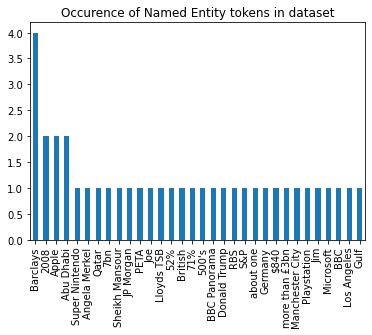

In [5]:
ner_df['entities'].value_counts()[1:].plot.bar(title='Occurence of Named Entity tokens in dataset')

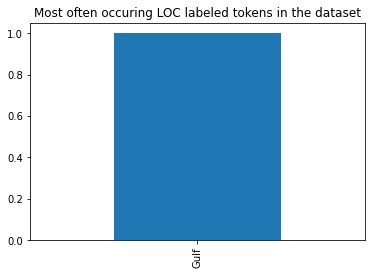

In [6]:
ner_type_to_viz = 'LOC'
ner_df[ner_df.entities_confidence == ner_type_to_viz]['entities'].value_counts().plot.bar(title='Most often occuring LOC labeled tokens in the dataset')

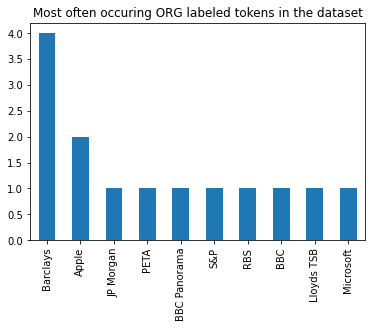

In [7]:
ner_type_to_viz = 'ORG'
ner_df[ner_df.entities_confidence == ner_type_to_viz]['entities'].value_counts().plot.bar(title='Most often occuring ORG labeled tokens in the dataset')